# Identification of Differentially Expressed Genes from bone and oesophagus cancer cell line data

Spoorthy Balasubrahmanya, Tejaswi Gorrepati, Bharathi Manoharan, Ratna Kameswari Prabhala

## 1. Overview and Motivation

### Overview

The systematic translation of cancer genomic data into knowledge of tumour biology and therapeutic possibilities remains challenging. Such efforts should be greatly aided by robust preclinical model systems that reflect the genomic diversity of human cancers and for which detailed genetic and pharmacological annotation is available. [1]

Here we took the Cancer Cell Line Encyclopedia (CCLE). It is a compilation of gene expression, chromosomal copy number and massively parallel sequencing data from 947 human cancer cell lines.[2] 

When coupled with pharmacological profiles for 24 anticancer drugs across 479 of the cell lines, this collection allows identification of genetic, lineage, and gene-expression-based predictors of drug sensitivity. [1]

Our midterm project focus is on identifying the differentially expressed(DE) genes from the CCLE dataset at bone and oesophagus level using different analysis methods and visualizaing the identified DE using different techniques. Analysis methods are discussed in section 3. Analysis and Visualization is covered in Section 4.

We used the subset of differentially expressed gene from the CCLE dataset to explore similarities between different cell lines using clustering.We have used Hierachical clustering for identifying groups in the dataset.Hierarchical clustering can be divided into two main types: Agglomerative and Divisive.We have used Agglomerative approach as it is good at identifying small clusters. We have applied Average and Single link to get 2 groups of patients and compared the clusters to Bone versus oesophagus.Lastly, we have compared two dendrograms. Here we have compared hierarchical clustering with complete linkage versus average method. The function tanglegram plots two dendrograms, side by side, with their labels connected by lines.

### Motivation

In class, we have used cancer cell line Encyclopedia dataset to identify differentailly expressed(DE) genes using t-test and t-test with Bonferroni Correction. Also, we have studied that there are other methods available to identify the DE genes.

We took the same dataset and applied the other analysis method to identify DE genes from the same dataset. We found out that we get different set of DE genes while using different methods. This is because different methods makes different assumptions in their analysis model and hence we get different results. We studied this concept in our lecture. Now with the results we got we are able to verify practically with the obtained result.

Also, we have learnt to apply other visualization techniques such as scatterplot (3D) in addition to heatmap and heatmap.2

We have used Hirerchical clustering where we can represent the observations in an attractive tree-based representation called Dendogram.We have used the agnes function where we can get the agglomerative coefficient, which measures the amount of clustering structure found (values closer to 1 suggest strong clustering structure).


## 2. Data

Go to GEO’s web site at http://www.ncbi.nlm.nih.gov/geo/.

Search for GSE36133
http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE36133

The NCBI Gene Expression Omnibus (GEO) is a public repository of microarray data. Given the rich and varied nature of this resource, it is only natural to want to apply BioConductor tools to these data. GEOquery is the bridge between GEO and BioConductor.[5]

###### GEOquerry
Using the GEOquerry(bioconductor package to query data), first we download the dataset Cancer Cell Line Encyclopedia (CCLE). GEO accession number for the dataset should be used in GEOQuery. For our dataset it is 'GSE36133' and hence we used the same to downalod the CCLE dataset using 'getGEO'.

###### R Documetation for getGEO :
Get a GEO object from NCBI or file. This function is the main user-level function in the GEOquery package. It directs the download (if no filename is specified) and parsing of a GEO SOFT format file into an R data structure specifically designed to make access to each of the important parts of the GEO SOFT format easily accessible.

The final cell line collection spans 36 cancer types. Representation of cell lines for each cancer type was mainly driven by cancer mortality in the United States, as a surrogate of unmet medical need, as well as availability. [2]

###### Experiment type for the dataset : 
Expression profiling by array. The dataset is generated using Affymetrix Human Genome U133 Plus 2.0 Array

In [2]:
#source("https://bioconductor.org/biocLite.R")
#biocLite()

#biocLite("GEOquery")
#library(GEOquery)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

In [3]:
# download the data
# this will take some time to download the data
#geoD<- getGEO('GSE36133')

Found 1 file(s)
GSE36133_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/jq/jt6zqh757r1cmf98vkh891jh0000gn/T//RtmpIAsMa3/GPL15308.soft


###### geoD:

The geoD that we got from the above step has two types of data: Gene expression data and Phenotype data. Phenotype daya contains the annottaions for data. Using phenotype data, we can figure out what kind of experiments were perfomed, what is the cancer line type for which expression data is generated, experimant date, etc.

Using 'exprs' fucntion, we get expression data from geoD.
Using 'pData' function, we get the Phenotype data.

In [4]:
# get the expression data from geoD
#mat <- exprs (geoD[[1]])
#dim (mat)

[1] 18926   917

In [5]:
#mat[1:6, 1:5]

,GSM886835,GSM886836,GSM886837,GSM886838,GSM886839
100009676_at,6.1161,6.2052,6.1249,6.6154,5.4236
10000_at,8.1556,6.6152,4.5676,4.3519,6.6723
10001_at,9.7864,9.9699,8.8720,9.1376,10.0290
10002_at,3.7977,4.0304,3.8455,3.7085,3.6431
10003_at,3.5458,3.8504,4.0458,3.9508,4.1589
100048912_at,4.0034,3.7959,4.1465,3.9271,3.9157


In [6]:
#get phenotype matrix from geoD
#p.mat <- pData (geoD[[1]])
#dim (p.mat)

[1] 917  42

In [7]:
#p.mat[1:6, c(1:2, 10)]

,title,geo_accession,characteristics_ch1
GSM886835,1321N1,GSM886835,primary site: central_nervous_system
GSM886836,143B,GSM886836,primary site: bone
GSM886837,22Rv1,GSM886837,primary site: prostate
GSM886838,23132/87,GSM886838,primary site: stomach
GSM886839,42-MG-BA,GSM886839,primary site: central_nervous_system
GSM886840,5637,GSM886840,primary site: urinary_tract


##### Bone and Oesophagus Cancer cell lines:

As we mentioned in the introduction, we will extract the expression data only for bone and oesophagus.

Using the code 'unlist(strsplit (as.character (p.mat[1,10]), ": "))[2]', we can identify the cancer cell line name.
Hence we are using 'apply' function to use this code to the entire matrix and get 'source.vec' containing the cancer cell line name for the expression data.

Then filter the expression data that corresponds only to 'bone' and 'oesophagus' and save it in a matrix 'mat.sub'.


In [8]:
#source.vec <- sapply (as.character(p.mat[, 10]), function(x) {unlist(strsplit(x, ": "))[2]})

In [9]:
#bone.ind <- which (as.character(source.vec) == "bone")
#oesophagus.ind <- which (as.character(source.vec) == "oesophagus")
#length (bone.ind)
#length (oesophagus.ind)

[1] 25

[1] 25

In [10]:
#mat.sub <- mat[, c(bone.ind, oesophagus.ind)]
#dim (mat.sub)
#write.table (mat.sub, file="sub_mat.txt", sep="\t", row.names=T, col.names=T)

#if the bioconductor GEOQuery didnot work, the below lines of code can be used ot get mat.sub matrix 
mat.sub <- read.table ("CCLE_expr_bone_oesophagus_forR.txt", sep="\t", header=T)
dim (mat.sub)
mat.sub[1:5, 1:6]

[1] 18926    50

## 3. Analysis

##### Differential Expression Analysis

### 3.1 T-test

The first statistical test conducted to identify differentially expressed genes is the independent two group t-test, the most common tests in statistics. We used the standard t-test implementation (“t.test”) in R for this task.

In [11]:
# compute p-value using t-test for all the genes
p.vec <- apply (mat.sub, 1, function(x) {t.test(x[1:25], x[26:50])$p.value})
length(p.vec)



[1] 18926

In [12]:
# Number of DE genes using threshold of p < 0.05
sum(p.vec < 0.05)

[1] 7495

In [13]:
# Number of DE genes using threshold of p < 0.01
sum(p.vec < 0.01)

[1] 5050

In [14]:
# Check DEGs at p-value= 0.05
de.ind.ttest <- which (p.vec < 0.05)
length(de.ind.ttest)

# Save indices for DE genes
DE.vec.ttest <- dimnames(mat.sub)[[1]][de.ind.ttest]


[1] 7495

In [15]:
# Save t-test DE genes in a new matrix
ttest.DE.mat <- mat.sub[de.ind.ttest,]
print("T-Test: Differentially expressed genes at 5% Significance level")
dim(ttest.DE.mat)
head(ttest.DE.mat)

[1] "T-Test: Differentially expressed genes at 5% Significance level"


[1] 7495   50

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
10001_at,9.9699,9.4435,9.0982,8.3093,8.1213,10.1340,8.4800,7.9325,7.5883,8.6140,⋯,10.2370,10.1540,10.2490,10.0870,10.0090,9.7460,10.3570,9.5466,10.2330,8.4970
10003_at,3.8504,4.9709,7.0736,4.5478,4.4081,3.7288,3.4481,3.7561,3.7874,3.4738,⋯,3.7158,3.8113,3.7185,3.8737,3.9786,3.6961,3.9091,3.6412,3.7559,4.1425
10004_at,4.4840,4.5170,4.3339,4.4126,4.3042,4.5197,4.9567,4.8558,5.9538,5.2057,⋯,4.5165,4.3005,5.0507,4.5808,4.2505,4.5074,4.5519,4.4772,4.7051,4.7943
10007_at,10.5040,9.5484,9.6612,9.5280,9.7397,9.8284,8.9811,10.4030,8.6362,8.2926,⋯,9.7812,9.1083,9.6652,9.6228,9.5288,9.7961,10.1670,9.5838,9.8391,9.7216
10009_at,8.3252,8.2911,8.4786,8.3825,7.4016,7.9532,7.5310,7.6329,7.4665,7.9140,⋯,8.4899,8.7227,8.5410,8.3258,8.1884,8.5054,8.0016,8.9550,8.8403,8.7288
1000_at,8.7679,5.8557,6.0765,9.8424,9.6820,8.5165,9.8103,8.5705,10.2920,9.4738,⋯,7.1605,3.9822,4.3452,8.2807,8.1367,7.4313,8.0753,4.2034,5.2357,5.0709


### 3.2 T-test with Bonferroni correction for multiple testing

In [16]:
# Perform the t.test with Bonferroni correction# Perfor 
adj.p.vec1 <- p.adjust (p.vec, method="bonferroni")
de.ind <- which (adj.p.vec1 < 0.05)
length(de.ind)

# Save indices for DE genes
DE.vec <- dimnames(mat.sub)[[1]][de.ind]

# Save Bonferroni DE genes in a new matrix
bonfr.DE.mat <- mat.sub[de.ind,]
print("Bonferroni correction: Differentially expressed genes at 5% Significance level")
head(bonfr.DE.mat)

[1] 904

[1] "Bonferroni correction: Differentially expressed genes at 5% Significance level"


,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
100127983_at,8.6811,4.4643,9.6642,8.1070,9.1816,9.4233,6.5559,7.6869,7.3560,7.6438,⋯,6.6152,4.3987,4.7537,7.2118,4.2008,5.1735,5.1272,7.2911,4.5511,4.6404
100128252_at,3.8410,7.3422,8.7294,10.0160,9.2002,4.2823,8.9964,8.1767,7.3241,6.9709,⋯,4.8368,4.2679,4.4375,4.0227,4.0670,5.2530,4.7222,4.2705,5.1971,4.2039
100131187_at,3.7783,3.4556,3.6921,3.5352,5.5307,3.7323,3.7562,3.7003,3.5714,3.9022,⋯,9.1442,10.6950,10.3330,10.0180,9.3082,9.9646,11.4140,8.9444,10.5320,11.4030
100132341_at,4.6420,6.0722,6.7248,5.6414,4.4890,5.1848,5.1239,4.8223,4.9381,4.7702,⋯,6.2219,6.3507,6.7592,5.2995,6.1945,8.0404,6.2744,5.7918,7.2455,6.5466
10019_at,10.2890,11.5160,11.6490,8.9909,10.3120,8.5506,9.2396,9.8790,9.5251,10.7830,⋯,7.5465,7.2081,8.2973,9.0369,7.1014,8.5608,7.3881,7.8424,7.3054,6.0771
1001_at,5.7313,6.1492,5.6881,5.2519,5.6411,6.1975,6.1667,5.6716,5.8244,5.7812,⋯,11.6350,9.3596,11.5000,10.0060,9.8371,12.3790,10.3130,9.1221,10.2940,10.1080


### 3.3 Benjamini–Hochberg Test

Benjamini-Hochberg false discovery detection method is also another test used for correction.

###### Adjust P-values for Multiple Comparisons

We will be using the function called 'p.adjust'. Given a set of p-values, returns p-values adjusted using one of several methods.
Usage: p.adjust(p, method = p.adjust.methods)

In our case, p will be 'p.vec' matrix and method for p-value adjustment is "BH" (Benjamini–Hochberg)


In [17]:
bht <- p.adjust(p.vec, method = "BH")

# select indices for the genes having p-value less than 0.05 (5% significance level)
de.bht.ind <- which(bht<0.05)
length(de.bht.ind)

# select indices for the genes having p-value less than 0.01 (1% significance level)
de.bht.ind2 <- which(bht<0.01)
length(de.bht.ind2)

# save the indices for Differentially expressed genes (DE)
de.bht.vec <- dimnames(mat.sub)[[1]][de.bht.ind]


[1] 5501

[1] 3430

In [18]:
# Save Benjamini–Hochberg DE genes in a new matrix
fdr.DE.mat <- mat.sub[de.bht.ind,]
print("Benjamini–Hochberg: Differentially expressed genes at 5% Significance level")
dim(fdr.DE.mat)
head(fdr.DE.mat)

[1] "Benjamini–Hochberg: Differentially expressed genes at 5% Significance level"


[1] 5501   50

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
10001_at,9.9699,9.4435,9.0982,8.3093,8.1213,10.1340,8.4800,7.9325,7.5883,8.6140,⋯,10.2370,10.1540,10.2490,10.0870,10.0090,9.7460,10.3570,9.5466,10.2330,8.4970
10003_at,3.8504,4.9709,7.0736,4.5478,4.4081,3.7288,3.4481,3.7561,3.7874,3.4738,⋯,3.7158,3.8113,3.7185,3.8737,3.9786,3.6961,3.9091,3.6412,3.7559,4.1425
10009_at,8.3252,8.2911,8.4786,8.3825,7.4016,7.9532,7.5310,7.6329,7.4665,7.9140,⋯,8.4899,8.7227,8.5410,8.3258,8.1884,8.5054,8.0016,8.9550,8.8403,8.7288
1000_at,8.7679,5.8557,6.0765,9.8424,9.6820,8.5165,9.8103,8.5705,10.2920,9.4738,⋯,7.1605,3.9822,4.3452,8.2807,8.1367,7.4313,8.0753,4.2034,5.2357,5.0709
100101467_at,5.9607,6.6056,6.4271,6.4220,5.9841,5.1109,6.7250,6.8241,6.8777,6.5803,⋯,4.7867,5.5138,6.2857,5.3047,5.7861,6.6897,7.3692,6.0128,4.6175,5.6506
100113407_at,6.9209,9.0537,8.3891,6.2683,4.4540,7.3971,4.9616,5.5780,6.0844,5.4407,⋯,4.2873,5.0902,4.0747,4.9842,4.7320,4.0854,5.7915,4.6944,3.9398,4.0797


### 3.4 LIMMA

LIMMA (Linear Models for Microarrays) is an established method for differential expression analyses of microarray. LIMMA accounts for the experimental design and uses an empirical Bayes approach to estimate the variance among samples. It has been shown to be a robust method for data with small sample sizes . LIMMA R package was used and two-group design matrix was considered.
http://www.bioconductor.org/packages/devel/bioc/vignettes/limma/inst/doc/usersguide.pdf

In [19]:
# Install and Load LIMMA Library

#source("https://bioconductor.org/biocLite.R")

#biocLite("limma")
library(limma)


Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA



In [20]:
design <- cbind (BONE=1, BONEVsOESOPHAGUS=c(rep(0, 25), rep(1, 25)))
fit <- lmFit (mat.sub, design)
fit <- eBayes (fit)

In [21]:
toptable.mat <- topTable (fit, coef="BONEVsOESOPHAGUS", adjust="fdr", number=nrow(mat.sub))
toptable.mat[1:5,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
114569_at,7.635240,8.175312,27.89929,4.401214e-32,8.329738e-28,61.76885
25927_at,-5.527228,7.343606,-22.77532,5.267539e-28,3.618482e-24,53.04234
4072_at,7.577400,8.692216,22.73279,5.735732e-28,3.618482e-24,52.96199
54845_at,6.177600,7.291216,22.11387,2.010495e-27,9.512655e-24,51.77620
999_at,4.927020,6.969866,21.39715,8.910532e-27,2.993897e-23,50.36340


In [22]:
# Number of genes with adjusted p-value less than 0.05
sum(toptable.mat$adj.P.Val < 0.05)

[1] 5616

In [23]:
# Number of genes with adjusted p-value less than 0.01
sum(toptable.mat$adj.P.Val < 0.01)

[1] 3607

In [24]:
# Number of genes with adjusted p-value less than 0.001
sum(toptable.mat$adj.P.Val < 0.001)

[1] 2039

In [25]:
# Save DE genes at p < 0.05
DE.limma <- rownames(toptable.mat[toptable.mat$adj.P.Val < 0.05,])

print("First 10 differentially expressed genes using LIMMA")
for (i in 1:10){
print(as.character(DE.limma[i]))}

[1] "First 10 differentially expressed genes using LIMMA"
[1] "114569_at"
[1] "25927_at"
[1] "4072_at"
[1] "54845_at"
[1] "999_at"
[1] "6692_at"
[1] "50848_at"
[1] "5493_at"
[1] "4921_at"
[1] "9053_at"


In [26]:
# Save Limma's top DE (adj.P.Val < 0.05) probes in a new matrix
limma.DE.mat <- mat.sub[DE.limma,]
print("Benjamini–Hochberg: Differentially expressed genes at 5% Significance level")
dim(limma.DE.mat)
head(limma.DE.mat)

[1] "Benjamini–Hochberg: Differentially expressed genes at 5% Significance level"


[1] 5616   50

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
114569_at,4.2113,4.2452,4.7768,4.7778,4.1420,4.2896,4.1584,4.0016,3.8696,4.1096,⋯,13.2790,12.4450,11.9170,11.3280,12.2960,11.9440,12.0620,7.1443,12.1370,11.8570
25927_at,11.6260,9.1917,11.4820,11.1010,9.8668,11.4930,10.5210,10.4840,10.3940,10.0440,⋯,4.6358,4.2448,3.9572,4.1572,4.5827,5.7370,4.5706,4.1693,4.3264,4.6055
4072_at,7.9613,3.9262,4.3619,4.1065,4.3876,8.9929,4.4370,5.6284,4.2781,3.4155,⋯,12.2960,12.6400,12.1420,13.0420,12.7860,12.7150,12.8120,9.7369,11.7120,12.7300
54845_at,3.8282,4.0155,5.1187,4.0778,4.0450,4.3228,4.0655,4.1024,4.1017,4.0160,⋯,10.7490,11.3000,10.6240,9.7096,11.1490,11.0990,11.4020,7.5416,10.5330,11.6090
999_at,4.5008,4.4259,4.3239,4.2208,4.3942,4.4542,4.5792,4.4473,4.5921,4.4367,⋯,9.8003,7.8246,9.8857,9.5621,10.6370,10.5320,8.8120,7.1866,10.0960,8.7390
6692_at,3.9987,4.9198,4.9217,4.3386,4.0415,4.4221,3.9461,4.2611,4.3292,3.9845,⋯,9.8733,9.9481,10.0350,8.8549,11.3000,9.5807,8.8786,7.0214,10.9090,10.0710


In [27]:
limma.DE.mat[1:5,]

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
114569_at,4.2113,4.2452,4.7768,4.7778,4.1420,4.2896,4.1584,4.0016,3.8696,4.1096,⋯,13.2790,12.4450,11.9170,11.3280,12.2960,11.944,12.0620,7.1443,12.1370,11.8570
25927_at,11.6260,9.1917,11.4820,11.1010,9.8668,11.4930,10.5210,10.4840,10.3940,10.0440,⋯,4.6358,4.2448,3.9572,4.1572,4.5827,5.737,4.5706,4.1693,4.3264,4.6055
4072_at,7.9613,3.9262,4.3619,4.1065,4.3876,8.9929,4.4370,5.6284,4.2781,3.4155,⋯,12.2960,12.6400,12.1420,13.0420,12.7860,12.715,12.8120,9.7369,11.7120,12.7300
54845_at,3.8282,4.0155,5.1187,4.0778,4.0450,4.3228,4.0655,4.1024,4.1017,4.0160,⋯,10.7490,11.3000,10.6240,9.7096,11.1490,11.099,11.4020,7.5416,10.5330,11.6090
999_at,4.5008,4.4259,4.3239,4.2208,4.3942,4.4542,4.5792,4.4473,4.5921,4.4367,⋯,9.8003,7.8246,9.8857,9.5621,10.6370,10.532,8.8120,7.1866,10.0960,8.7390


### 3.5 SAM

In [28]:
#source("https://bioconductor.org/biocLite.R")
#biocLite(c("gplots", "cluster"))

#install.packages('samr',repos = "http://cran.us.r-project.org")
#biocLite("impute")

# Load the library samr
library(samr)

Loading required package: impute
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



In [29]:
##vector of outcome measurements

y <- c(rep(1, 25), rep(2, 25))  
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [30]:
# Gene names = probe ids (row names)

genenames <- rownames(mat.sub)
genenames[1:5]

[1] "100009676_at" "10000_at"     "10001_at"     "10002_at"     "10003_at"

In [31]:
head(mat.sub)
length(mat.sub)

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
100009676_at,6.2052,5.4153,5.5729,5.8700,5.8151,5.2842,5.4328,5.7178,5.6711,5.7203,⋯,5.7670,5.7766,5.9101,5.6271,5.8647,5.2124,5.5740,6.1222,5.3296,6.0811
10000_at,6.6152,4.6571,4.9790,7.8872,5.9303,6.9926,7.8517,6.9289,7.1600,7.5505,⋯,4.9399,6.5913,7.3661,6.7324,4.9159,4.7370,5.1045,7.6580,5.5755,6.2763
10001_at,9.9699,9.4435,9.0982,8.3093,8.1213,10.1340,8.4800,7.9325,7.5883,8.6140,⋯,10.2370,10.1540,10.2490,10.0870,10.0090,9.7460,10.3570,9.5466,10.2330,8.4970
10002_at,4.0304,4.0395,3.8002,3.5999,4.0901,3.8586,3.9325,3.9163,3.8292,3.7656,⋯,3.8315,3.7503,4.0392,4.0399,3.7942,3.9052,3.9891,3.7970,3.8861,3.8341
10003_at,3.8504,4.9709,7.0736,4.5478,4.4081,3.7288,3.4481,3.7561,3.7874,3.4738,⋯,3.7158,3.8113,3.7185,3.8737,3.9786,3.6961,3.9091,3.6412,3.7559,4.1425
100048912_at,3.7959,3.7983,3.9965,3.9958,3.8789,4.1967,4.1982,3.8399,3.9670,3.9737,⋯,3.9061,3.9526,3.7952,4.0039,3.7864,4.0287,3.7911,4.2591,3.8743,4.1562


[1] 946300

In [32]:
# Create SAM's list object

data <- list(x = mat.sub, y = y, geneid = genenames, genenames = genenames, logged2 = TRUE)

# Perform SAM analysis of “Two class unpaired” type

samr.obj <- samr(data, resp.type = "Two class unpaired", nperms = 100)
names(samr.obj)

perm= 1
perm= 2
perm= 3
perm= 4
perm= 5
perm= 6
perm= 7
perm= 8
perm= 9
perm= 10
perm= 11
perm= 12
perm= 13
perm= 14
perm= 15
perm= 16
perm= 17
perm= 18
perm= 19
perm= 20
perm= 21
perm= 22
perm= 23
perm= 24
perm= 25
perm= 26
perm= 27
perm= 28
perm= 29
perm= 30
perm= 31
perm= 32
perm= 33
perm= 34
perm= 35
perm= 36
perm= 37
perm= 38
perm= 39
perm= 40
perm= 41
perm= 42
perm= 43
perm= 44
perm= 45
perm= 46
perm= 47
perm= 48
perm= 49
perm= 50
perm= 51
perm= 52
perm= 53
perm= 54
perm= 55
perm= 56
perm= 57
perm= 58
perm= 59
perm= 60
perm= 61
perm= 62
perm= 63
perm= 64
perm= 65
perm= 66
perm= 67
perm= 68
perm= 69
perm= 70
perm= 71
perm= 72
perm= 73
perm= 74
perm= 75
perm= 76
perm= 77
perm= 78
perm= 79
perm= 80
perm= 81
perm= 82
perm= 83
perm= 84
perm= 85
perm= 86
perm= 87
perm= 88
perm= 89
perm= 90
perm= 91
perm= 92
perm= 93
perm= 94
perm= 95
perm= 96
perm= 97
perm= 98
perm= 99
perm= 100


[1] "n"                    "x"                    "xresamp"             
 [4] "y"                    "argy"                 "censoring.status"    
 [7] "testStatistic"        "nperms"               "nperms.act"          
[10] "tt"                   "numer"                "sd"                  
[13] "sd.internal"          "s0"                   "s0.perc"             
[16] "evo"                  "perms"                "permsy"              
[19] "nresamp"              "nresamp.perm"         "all.perms.flag"      
[22] "ttstar"               "ttstar0"              "eigengene"           
[25] "eigengene.number"     "pi0"                  "foldchange"          
[28] "foldchange.star"      "sdstar.keep"          "resp.type"           
[31] "resp.type.arg"        "assay.type"           "stand.contrasts"     
[34] "stand.contrasts.star" "stand.contrasts.95"   "depth"               
[37] "call"

In [33]:
# Compute thresholds for different delta


delta.table <- samr.compute.delta.table(samr.obj, min.foldchange = 1.5)


Computing delta table
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [34]:
head(delta.table)

delta,# med false pos,90th perc false pos,# called,median FDR,90th perc FDR,cutlo,cuthi
0.000000000,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726
0.009108608,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726
0.036434432,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726
0.081977473,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726
0.145737729,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726
0.227715202,293.8301,561.8882,4042,0.07269423,0.1390124,-0.7554324,0.8664726


In [35]:
# Check delta corresponding to median FDR 0.5

delta.table[delta.table[, "median FDR"] < 0.5, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         0.00000000        293.83007503        561.88818556       4042.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07269423          0.13901242         -0.75543239          0.86647260

In [36]:
# Check delta corresponding to median FDR 0.4

delta.table[delta.table[, "median FDR"] < 0.4, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         0.00000000        293.83007503        561.88818556       4042.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07269423          0.13901242         -0.75543239          0.86647260

In [37]:
# Try median FDR 0.3

delta.table[delta.table[, "median FDR"] < 0.3, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         0.00000000        293.83007503        561.88818556       4042.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07269423          0.13901242         -0.75543239          0.86647260

In [38]:
# Try median FDR 0.2

delta.table[delta.table[, "median FDR"] < 0.2, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         0.00000000        293.83007503        561.88818556       4042.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07269423          0.13901242         -0.75543239          0.86647260

In [39]:
# Try median FDR 0.1

delta.table[delta.table[, "median FDR"] < 0.1, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         0.00000000        293.83007503        561.88818556       4042.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07269423          0.13901242         -0.75543239          0.86647260

In [40]:
# Try median FDR 0.01

delta.table[delta.table[, "median FDR"] < 0.01, ][1, ]

delta     # med false pos 90th perc false pos            # called 
         1.31163956         32.64778611        123.81425552       3488.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.00936003          0.03549721         -2.31988900          2.19864605

In [41]:
# Try median FDR 0.001

delta.table[delta.table[, "median FDR"] < 0.001, ][1, ]

delta     # med false pos 90th perc false pos            # called 
       2.049437e+00        7.419951e-01        4.996101e+00        2.316000e+03 
         median FDR       90th perc FDR               cutlo               cuthi 
       3.203779e-04        2.157211e-03       -3.386132e+00        3.295293e+00

In [42]:
# Select the delta

delta <- 2

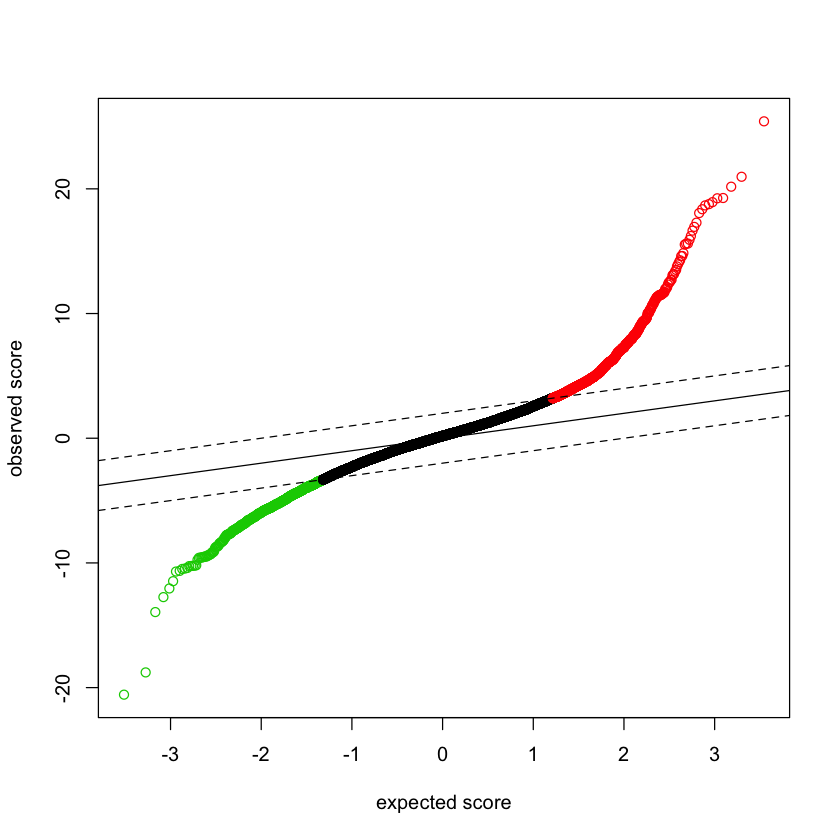

In [43]:
# SAM Plot

samr.plot(samr.obj, delta)

In [44]:
# Summarize significant genes
siggenes.table <- samr.compute.siggenes.table(samr.obj, delta, data, delta.table, min.foldchange = 1.5)

In [45]:
# What data we have in the summary list
names(siggenes.table)  

# Number of upregulated genes
nrow(siggenes.table$genes.up)  

# Number of downregulated
nrow(siggenes.table$genes.lo)

[1] "genes.up"            "genes.lo"            "color.ind.for.multi"
[4] "ngenes.up"           "ngenes.lo"

[1] 1297

[1] 1108

In [46]:
# Extract upregulated and downregulated gene IDs

up.ids <- siggenes.table$genes.up[, "Gene ID"]  
dn.ids <- siggenes.table$genes.lo[, "Gene ID"]

In [47]:
# Save SAM's DE genes in a matrix

sam.ids <- append((up.ids),(dn.ids))
length(sam.ids)
sam.DE.mat <- mat.sub[sam.ids,]
sam.DE.mat[1:5,]

[1] 2405

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
114569_at,4.2113,4.2452,4.7768,4.7778,4.1420,4.2896,4.1584,4.0016,3.8696,4.1096,⋯,13.2790,12.4450,11.9170,11.3280,12.296,11.9440,12.0620,7.1443,12.137,11.857
4072_at,7.9613,3.9262,4.3619,4.1065,4.3876,8.9929,4.4370,5.6284,4.2781,3.4155,⋯,12.2960,12.6400,12.1420,13.0420,12.786,12.7150,12.8120,9.7369,11.712,12.730
54845_at,3.8282,4.0155,5.1187,4.0778,4.0450,4.3228,4.0655,4.1024,4.1017,4.0160,⋯,10.7490,11.3000,10.6240,9.7096,11.149,11.0990,11.4020,7.5416,10.533,11.609
6692_at,3.9987,4.9198,4.9217,4.3386,4.0415,4.4221,3.9461,4.2611,4.3292,3.9845,⋯,9.8733,9.9481,10.0350,8.8549,11.300,9.5807,8.8786,7.0214,10.909,10.071
999_at,4.5008,4.4259,4.3239,4.2208,4.3942,4.4542,4.5792,4.4473,4.5921,4.4367,⋯,9.8003,7.8246,9.8857,9.5621,10.637,10.5320,8.8120,7.1866,10.096,8.739


### 4. Visualization using the identified DE genes

In [48]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("ComplexHeatmap")
#install.packages("gplots")

library(gplots)
library(RColorBrewer)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [49]:
# modify the distance function to use correlation 

newdist <- function (x) {as.dist (1-cor(t(x)))/2}

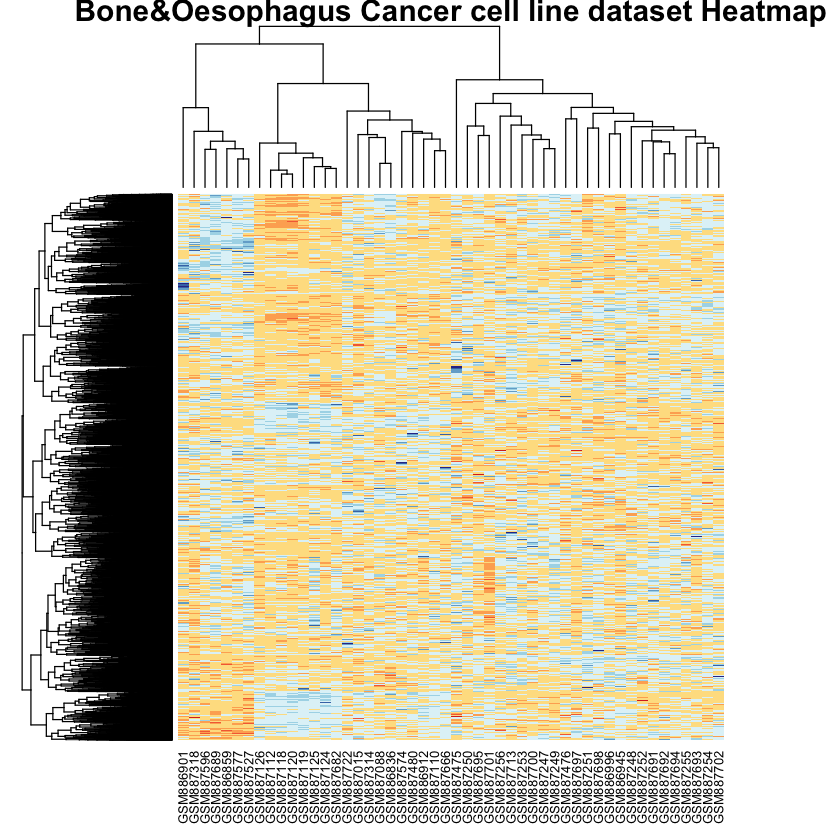

In [50]:
#Bone and oesophagus cancer cell line dataset heatmap
heatmap(as.matrix(mat.sub), distfun=newdist,labRow = FALSE, col=brewer.pal(10,"RdYlBu"), main = "Bone&Oesophagus Cancer cell line dataset Heatmap")

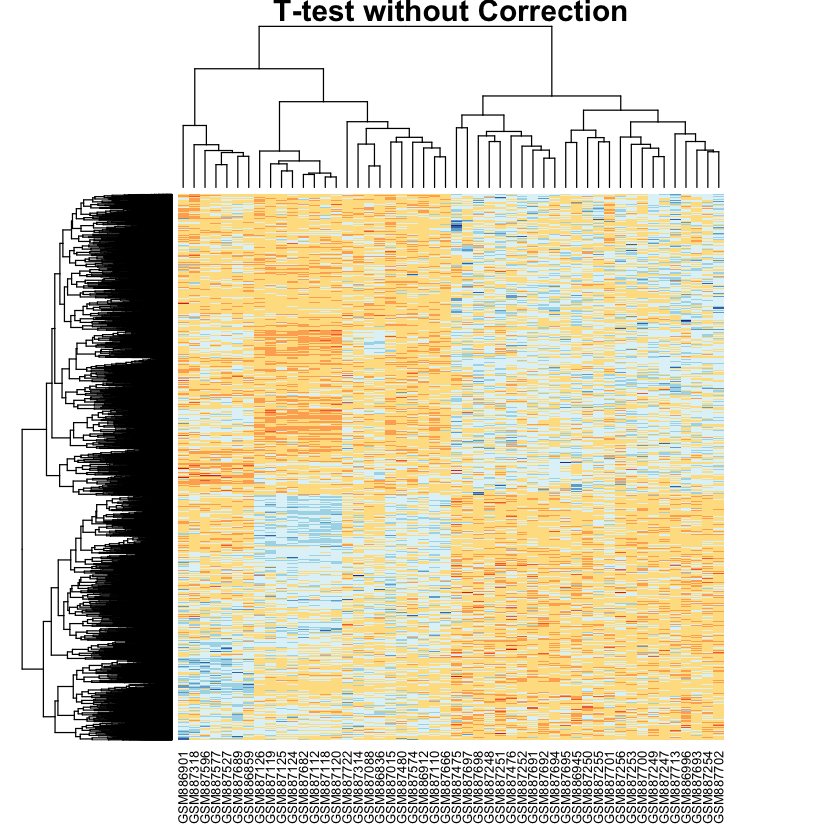

In [51]:
# Heatmap for DE genes resulted from T-test with no correction 
heatmap (as.matrix(ttest.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test without Correction")

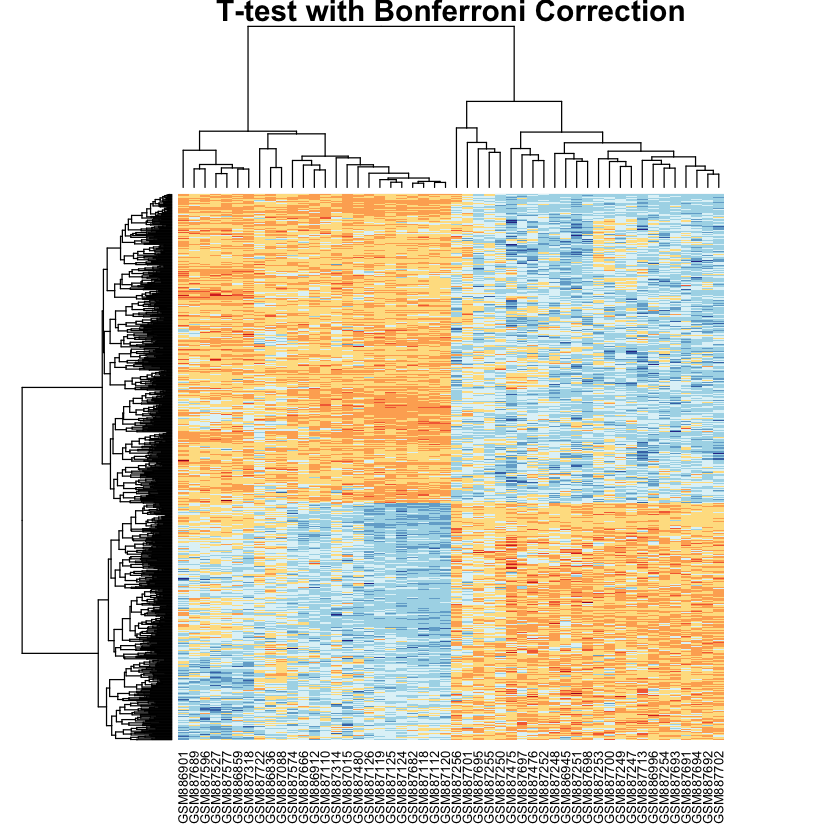

In [52]:
# Heatmap for DE genes resulted from T-test with Bonferroni correction 
heatmap (as.matrix(bonfr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test with Bonferroni Correction")

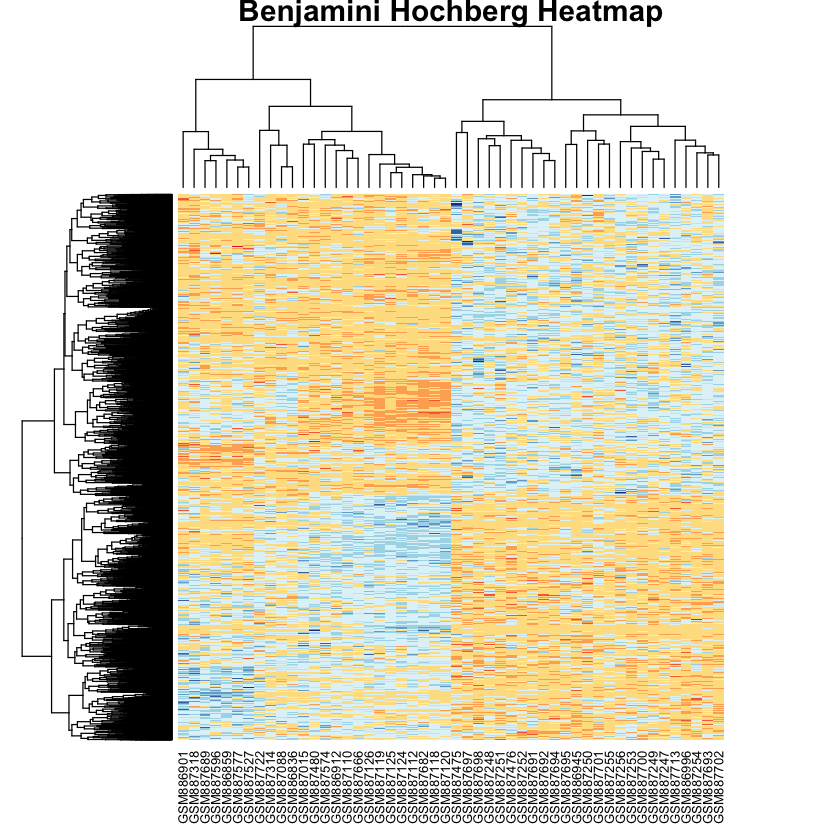

In [53]:
# Heatmap for DE genes resulted from Benjamini Hochberg (FDR)
heatmap (as.matrix(fdr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="Benjamini Hochberg Heatmap")

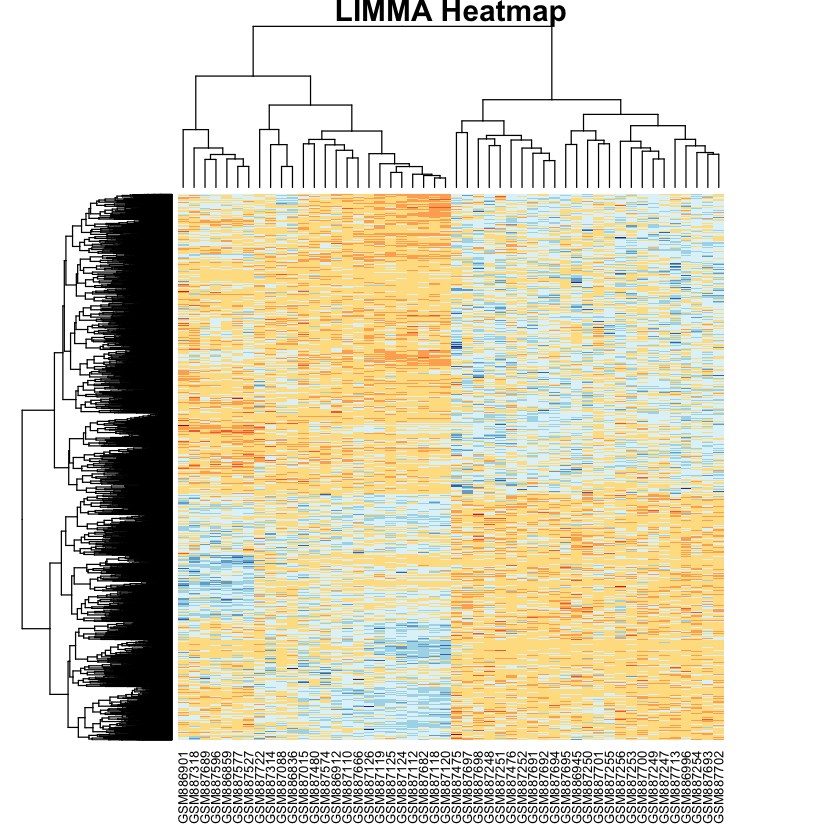

In [54]:
# Heatmap for DE genes resulted from LIMMA
heatmap (as.matrix(limma.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="LIMMA Heatmap")

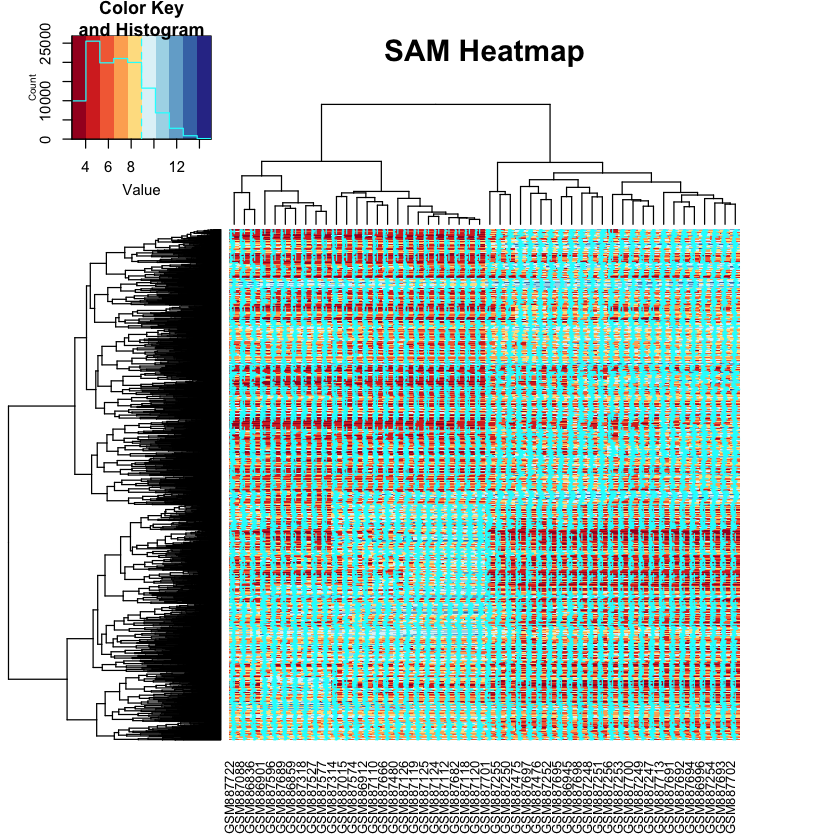

In [55]:
# Heatmap for DE genes resulted from SAM

heatmap.2<-heatmap.2(as.matrix(sam.DE.mat), distfun=newdist, labRow = FALSE,col=brewer.pal(10,"RdYlBu"), main="SAM Heatmap")

In [56]:
#removing row names and column names

m <- sam.DE.mat
colnames(m)<- NULL
rownames(m)<-NULL
head(m)

4.2113,4.2452,4.7768,4.7778,4.1420,4.2896,4.1584,4.0016,3.8696,4.1096,⋯,13.2790,12.4450,11.9170,11.3280,12.296,11.9440,12.0620,7.1443,12.137,11.857
7.9613,3.9262,4.3619,4.1065,4.3876,8.9929,4.4370,5.6284,4.2781,3.4155,⋯,12.2960,12.6400,12.1420,13.0420,12.786,12.7150,12.8120,9.7369,11.712,12.730
3.8282,4.0155,5.1187,4.0778,4.0450,4.3228,4.0655,4.1024,4.1017,4.0160,⋯,10.7490,11.3000,10.6240,9.7096,11.149,11.0990,11.4020,7.5416,10.533,11.609
3.9987,4.9198,4.9217,4.3386,4.0415,4.4221,3.9461,4.2611,4.3292,3.9845,⋯,9.8733,9.9481,10.0350,8.8549,11.300,9.5807,8.8786,7.0214,10.909,10.071
4.5008,4.4259,4.3239,4.2208,4.3942,4.4542,4.5792,4.4473,4.5921,4.4367,⋯,9.8003,7.8246,9.8857,9.5621,10.637,10.5320,8.8120,7.1866,10.096,8.739
4.4887,4.0735,3.6463,6.5372,4.4654,4.8225,4.2841,4.6222,4.3653,4.4913,⋯,10.0300,9.8860,10.1170,10.2930,10.311,10.8220,6.6906,8.6248,11.175,10.780


In [57]:
# installing scattered plot 3D graph

#install.packages("scatterplot3d") # Install

library("scatterplot3d") # load

In [58]:
# extracting first 6 rows as header

data(sam.DE.mat)
head(sam.DE.mat)

Warning message in data(sam.DE.mat):
“data set ‘sam.DE.mat’ not found”

,GSM886836,GSM886859,GSM886901,GSM886912,GSM887015,GSM887088,GSM887110,GSM887112,GSM887118,GSM887119,⋯,GSM887692,GSM887693,GSM887694,GSM887695,GSM887697,GSM887698,GSM887700,GSM887701,GSM887702,GSM887713
114569_at,4.2113,4.2452,4.7768,4.7778,4.1420,4.2896,4.1584,4.0016,3.8696,4.1096,⋯,13.2790,12.4450,11.9170,11.3280,12.296,11.9440,12.0620,7.1443,12.137,11.857
4072_at,7.9613,3.9262,4.3619,4.1065,4.3876,8.9929,4.4370,5.6284,4.2781,3.4155,⋯,12.2960,12.6400,12.1420,13.0420,12.786,12.7150,12.8120,9.7369,11.712,12.730
54845_at,3.8282,4.0155,5.1187,4.0778,4.0450,4.3228,4.0655,4.1024,4.1017,4.0160,⋯,10.7490,11.3000,10.6240,9.7096,11.149,11.0990,11.4020,7.5416,10.533,11.609
6692_at,3.9987,4.9198,4.9217,4.3386,4.0415,4.4221,3.9461,4.2611,4.3292,3.9845,⋯,9.8733,9.9481,10.0350,8.8549,11.300,9.5807,8.8786,7.0214,10.909,10.071
999_at,4.5008,4.4259,4.3239,4.2208,4.3942,4.4542,4.5792,4.4473,4.5921,4.4367,⋯,9.8003,7.8246,9.8857,9.5621,10.637,10.5320,8.8120,7.1866,10.096,8.739
5493_at,4.4887,4.0735,3.6463,6.5372,4.4654,4.8225,4.2841,4.6222,4.3653,4.4913,⋯,10.0300,9.8860,10.1170,10.2930,10.311,10.8220,6.6906,8.6248,11.175,10.780


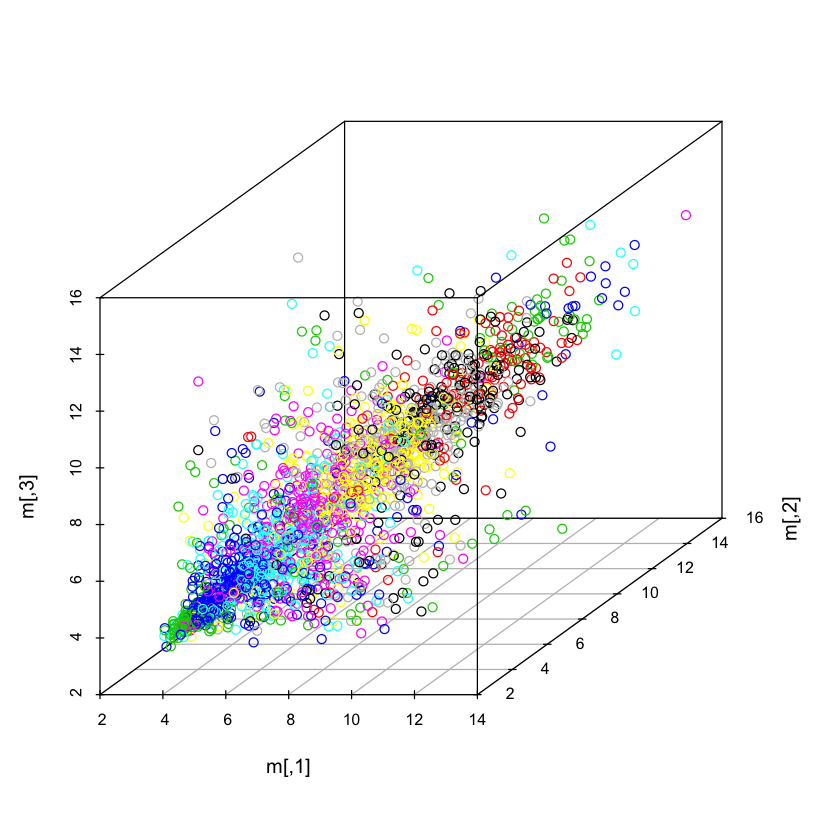

In [59]:
# 3d scattered plot for SAM DE

scatterplot3d(m)

### 5. Clustering

In [25]:
mat.sub.de160 <- read.table ("CCLE_expr_bone_oesophagus_DE160.txt", sep="\t", header=T)
dim (mat.sub.de160)

[1] 160  50

In [26]:
mat.sub.de160[1:5, 1:6]

,B_GSM886836,B_GSM886859,B_GSM886901,B_GSM886912,B_GSM887015,B_GSM887088
100127983_at,8.6811,4.4643,9.6642,8.1070,9.1816,9.4233
100131187_at,3.7783,3.4556,3.6921,3.5352,5.5307,3.7323
10019_at,10.2890,11.5160,11.6490,8.9909,10.3120,8.5506
1001_at,5.7313,6.1492,5.6881,5.2519,5.6411,6.1975
10045_at,3.9491,4.2790,5.4000,3.7774,3.9358,3.8043


In [27]:
#source("https://bioconductor.org/biocLite.R")
#biocLite(c("gplots", "cluster"))

library(cluster)   # clustering algorithms
library(purrr)

### 5.1 Agglomerative Hierarchical clustering algorithm(agnes)
We can use the agnes function. hclust and agnes functions behave very similarly.
However, with the agnes function you can also get the agglomerative coefficient, which measures the amount of clustering structure found (values closer to 1 suggest strong clustering structure).Here we see that complete method identifies the strongest clustering structure of the three methods assessed.

In [28]:
# methods to assess
m <- c("average", "single", "complete")
names(m) <- c( "average", "single", "complete")

# function to compute coefficient
ac <- function(x) {agnes(mat.sub.de160, method = x)$ac}

map_dbl(m, ac)

average    single  complete 
0.7572799 0.4766501 0.8524074

### 5.2 Hierarchical clustering (hclust) using average link
Now we will perform agglomerative Hierachical Clustering with hclust. First we will compute the dissimilarity values with dist and then feed these values into hclust and specify the Agglomeration method to be used (i.e. “complete”, “average”, “single”).

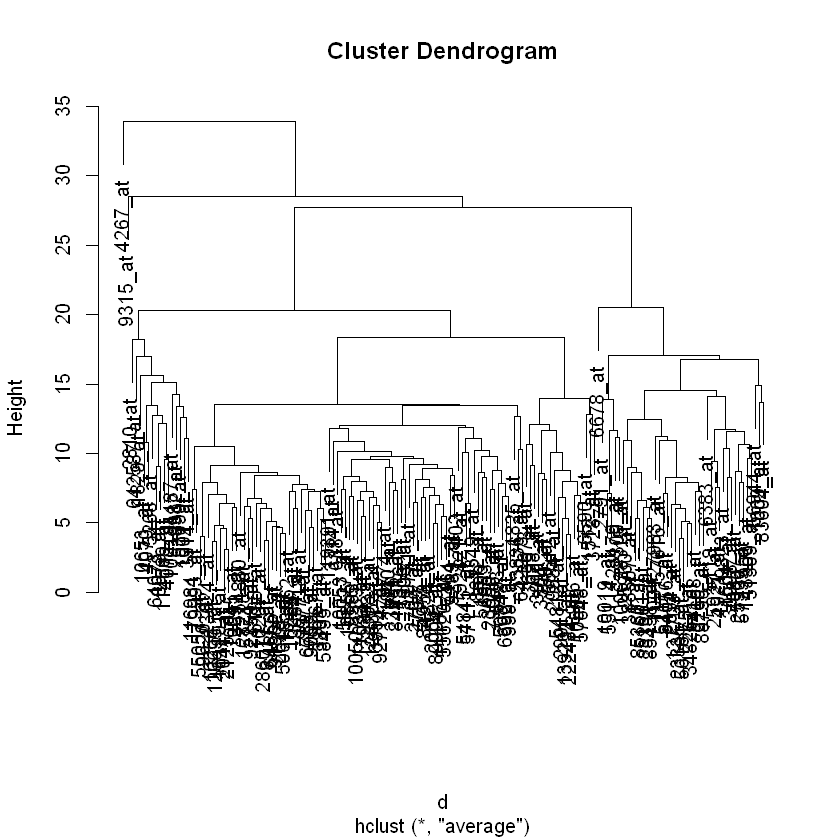

In [29]:
d <- dist (mat.sub.de160, method="euclidean")
ret.hclust1 <- hclust (d, method="average")
# The following dendrogram was obtained using Euclidean distance 
# as the pairwise dissimilarity measure and hierarchical average link
plot (ret.hclust1)

In [30]:
#ret.hclust2 <- agnes(mat.sub.de160, method = "average")
#pltree(ret.hclust2)

### 5.3 Working with Dendograms

In the dendrogram displayed above, each leaf corresponds to one observation. As we move up the tree, observations that are similar to each other are combined into branches, which are themselves fused at a higher height.

OBSERVATION : The height of the fusion, provided on the vertical axis, indicates the (dis)similarity between two observations.

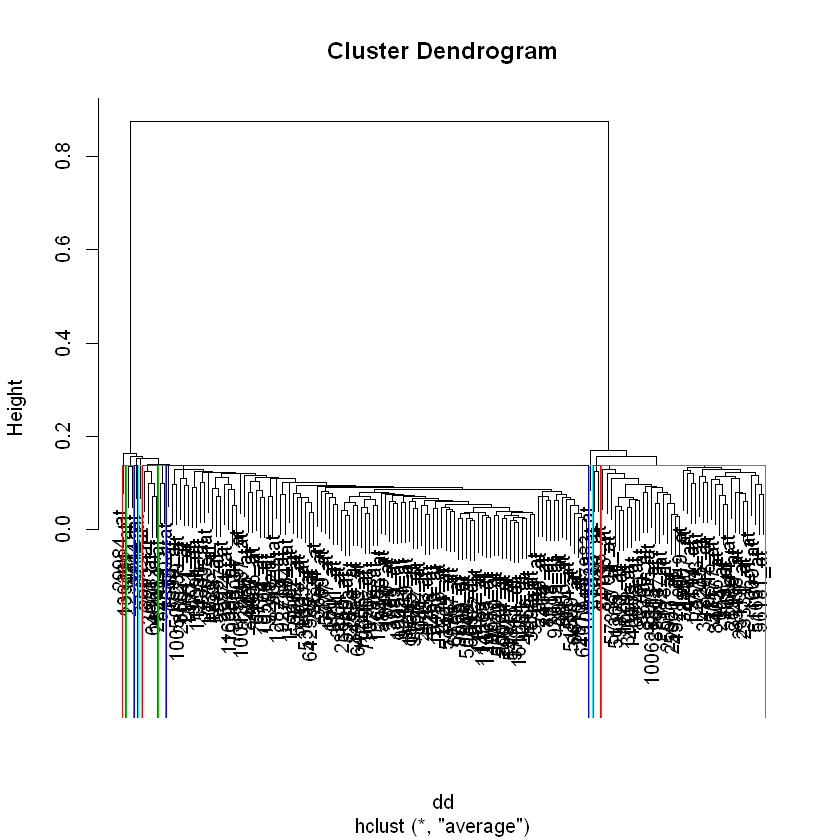

In [31]:
# convert correlation coefficient into a distance measure
dd <- as.dist ((1- cor(t(mat.sub.de160)))/2)
# create clusters using correlation as our pairwise similarity measure and hierarchical complete link
ret.hclust2 <- hclust (dd, method="average")
plot (ret.hclust2)
rect.hclust(ret.hclust2, k = 10, border = 2:5)

##### cutree()
The height of the cut to the dendrogram controls the number of clusters obtained. It plays the same role as the k in k-means clustering. In order to identify sub-groups (i.e. clusters).

So now we can cut off the tree at the desired number of clusters using cutree.

In [32]:
# Cut tree into 10 groups
sub_grp <- cutree(ret.hclust2, k = 10)

# Number of members in each cluster
table(sub_grp)

sub_grp
  1   2   3   4   5   6   7   8   9  10 
  1 105  41   2   2   2   1   1   4   1 

###### We can also compare two dendrograms. Here we compare hierarchical clustering with complete linkage versus Average method. The function tanglegram plots two dendrograms, side by side, with their labels connected by lines.

###### Here we compare hierarchical clustering with complete linkage versus average method. 
The function tanglegram plots two dendrograms, side by side, with their labels connected by lines.

In [33]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("dendextend")


In [34]:
library(stats)
library(dendextend)

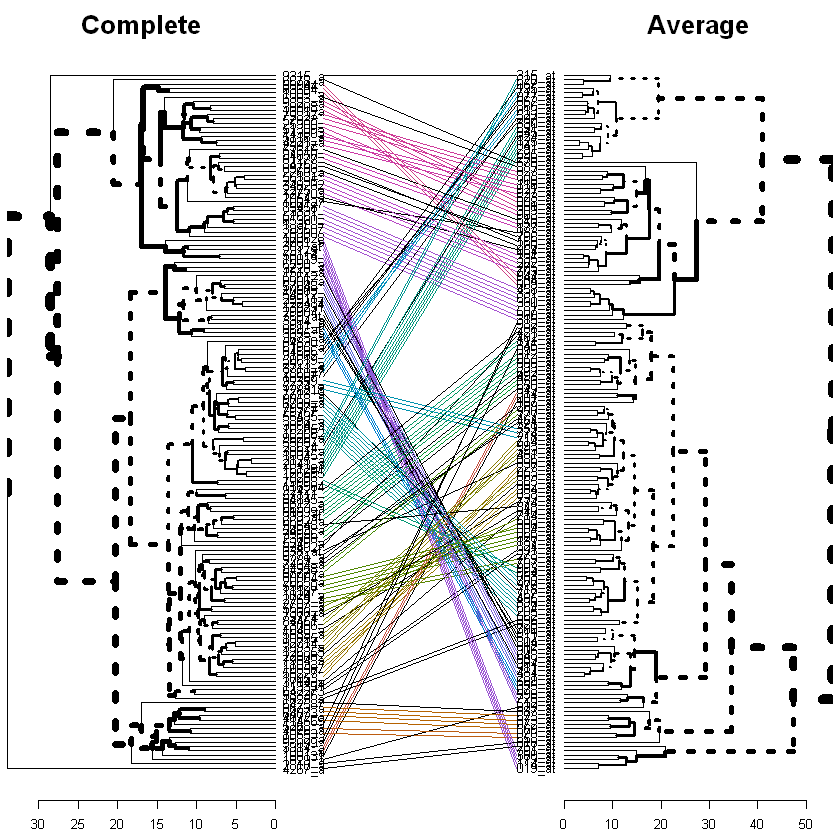

In [35]:
# Compute distance matrix
d <- dist (mat.sub.de160, method="euclidean")

# Compute 2 hierarchical clusterings
ret.hclust3 <- hclust(d, method = "complete")
ret.hclust4 <- hclust (d, method="average")

# Create two dendrograms
dend1 <- as.dendrogram (ret.hclust3)
dend2 <- as.dendrogram (ret.hclust4)
#dend1 <- mat.sub.de160 %>% dist %>% hclust("complete") %>% as.dendrogram
#dend2 <- mat.sub.de160 %>% dist %>% hclust("average") %>% as.dendrogram

# Create a list to hold dendrograms
#dend_list <- dendlist(dend1, dend2)
tanglegram(dend2, dend1,main_left = "Complete",main_right = "Average",sort='TRUE',lwd = 1)

In [36]:
#library(devtools)
#install_github("kassambara/factoextra")

library(ggplot2)
library("factoextra")

sub_grp
  1   2 
 44 116 

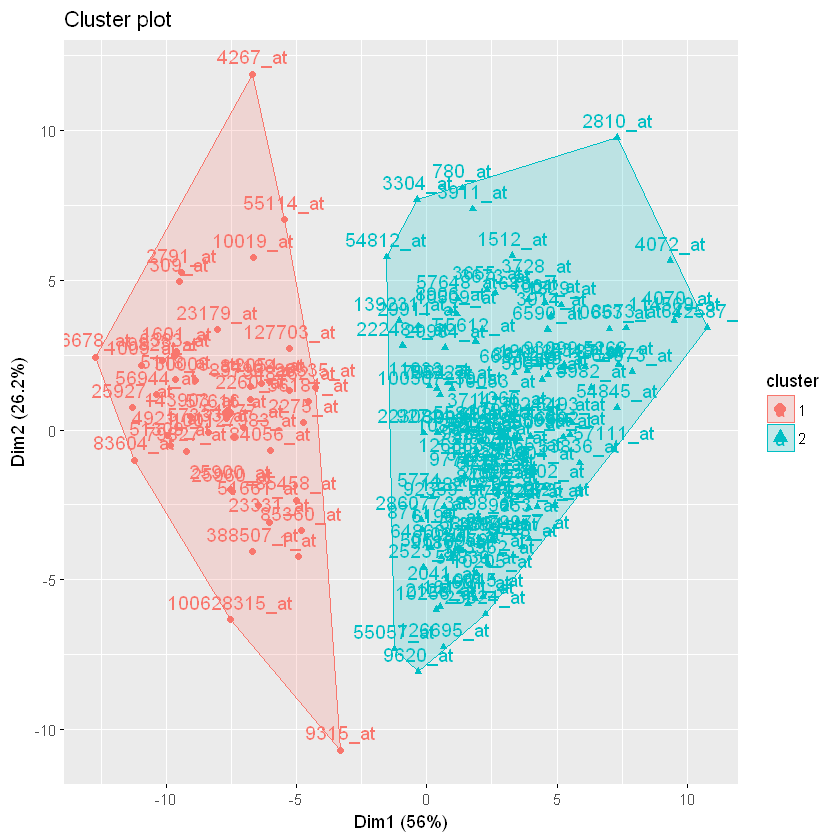

In [37]:
# Cut tree into 2 groups
sub_grp <- cutree(ret.hclust2, k = 2)

# Number of members in each cluster
table(sub_grp)
#the fviz_cluster function from the factoextra package visualize the result in a scatter plot.
fviz_cluster(list(data = mat.sub.de160, cluster = sub_grp))

### 5.4 Agglomerative hierarchial clustering (hclust) using Single link
#we will perform agglomerative Hierachical Clustering with hclust. First we will compute the dissimilarity values with dist and then feed these values into hclust and specify the Agglomeration method to be used as "single".

In [38]:
# reading the data and naming the variable as mat.sub_SL
mat.sub_SL <- read.table ("CCLE_expr_bone_oesophagus_DE160.txt", sep="\t", header=T)
dim (mat.sub_SL)

[1] 160  50

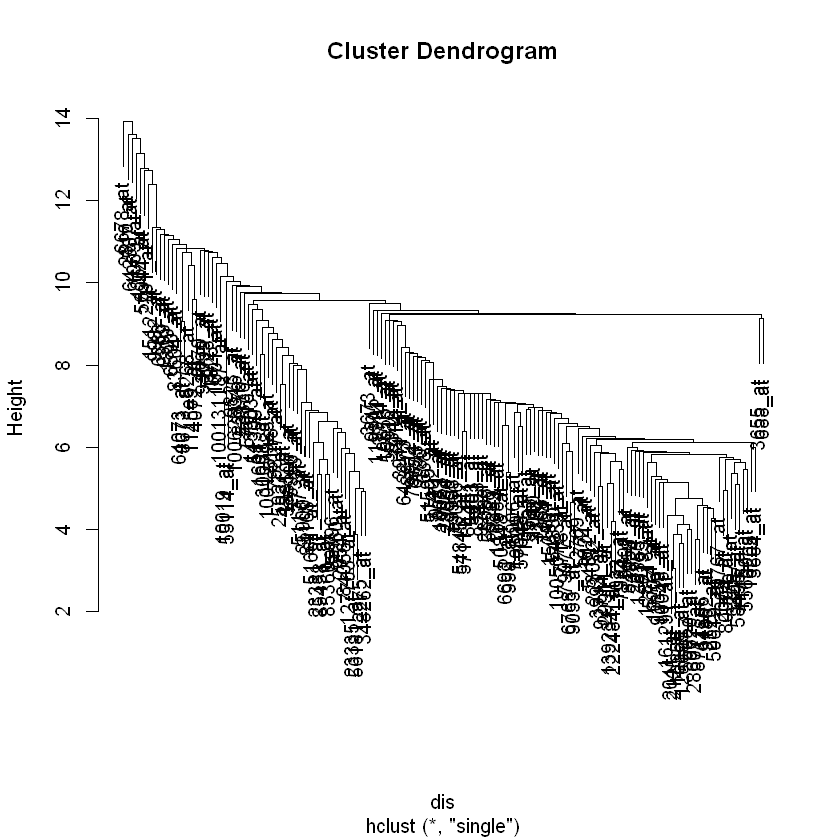

In [39]:
dis <- dist (mat.sub_SL, method="euclidean")
ret.hclust3 <- hclust (dis, method="single")
# The following dendrogram was obtained using Euclidean distance 
# as the pairwise dissimilarity measure and hierarchical single link
plot (ret.hclust3)

In [40]:
# each leaf corresponds to one observation
#ret.hclust3 <- agnes(mat.sub_SL, method = "single")
#pltree(ret.hclust3)

###### Creating a dendogram for the hierarchial cluster created using single link method
#In the dendrogram displayed above, each leaf corresponds to one observation. As we move up the tree, observations that are similar to each other are combined into branches, which are themselves fused at a higher height.
#The height of the fusion, provided on the vertical axis, indicates the (dis)similarity between two observations. 
#OBSERVATION::The higher the height of the fusion, the less similar the observations are.


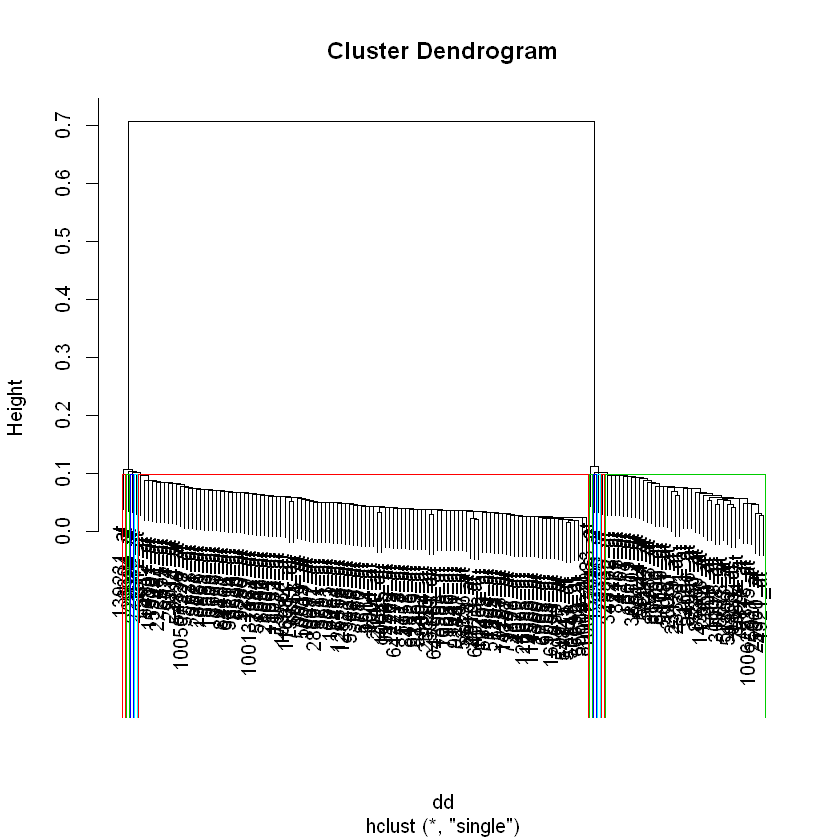

In [41]:
# convert correlation coefficient into a distance measure
dd <- as.dist ((1- cor(t(mat.sub_SL)))/2)
# create clusters using correlation as our pairwise similarity measure and hierarchical single link
ret.hclust4 <- hclust (dd, method="single")
plot (ret.hclust4)
rect.hclust(ret.hclust4, k = 10, border = 2:5)

##### Cut the dendogram into different groups  (cuttree())
In order to identify sub-groups (i.e. clusters), we can cut the dendrogram at a certain height.
The height of the cut to the dendrogram controls the number of clusters obtained. It plays the same role as the k in k-means clustering.

The function cutree() is used and it returns a vector containing the cluster number of each observation:


In [42]:
# Cut tree into 10 groups
sub_grp2 <- cutree(ret.hclust4, k = 10)

# Number of members in each cluster
table(sub_grp2)

sub_grp2
  1   2   3   4   5   6   7   8   9  10 
  1 112  40   1   1   1   1   1   1   1 

In [43]:
# modify the distance function to use correlation instead
newdistSL <- function (x) {as.dist (1-cor(t(x)))/2}

In [44]:
library(RColorBrewer)

Warning message in plot.window(...):
""dendrogram" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""dendrogram" is not a graphical parameter"Warning message in title(...):
""dendrogram" is not a graphical parameter"

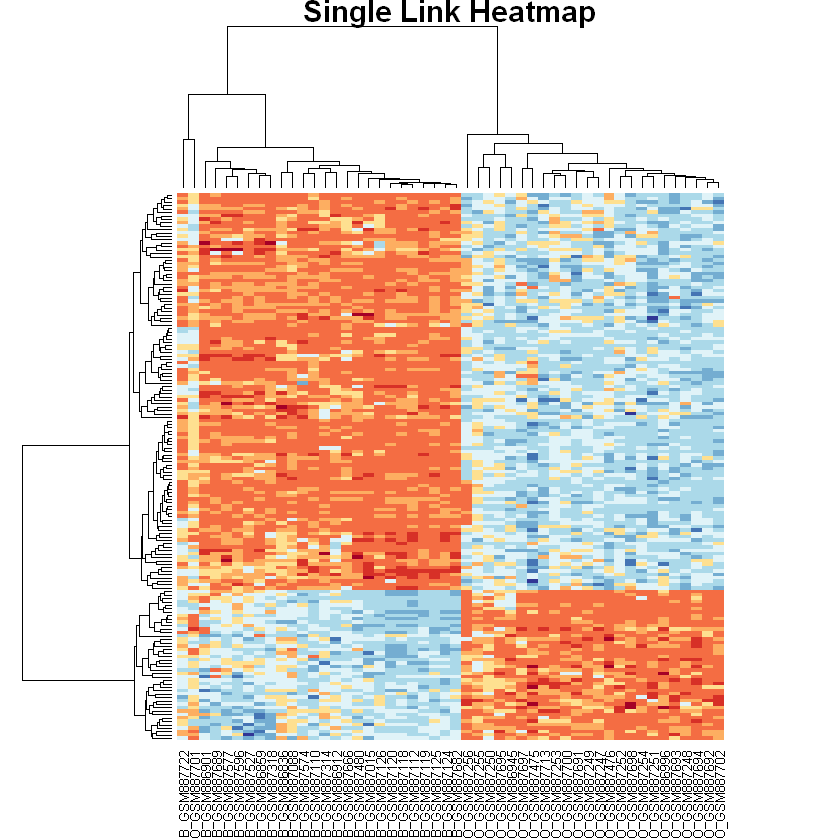

In [45]:
heatmap<-heatmap(as.matrix(mat.sub_SL), distfun=newdistSL, labRow = FALSE,dendrogram="row",col=brewer.pal(10,"RdYlBu"), main="Single Link Heatmap")

### References

[1] https://www.ncbi.nlm.nih.gov/pubmed?LinkName=gds_pubmed&from_uid=200036133

[2] https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE36133

[3] https://github.com/Bioconductor-notebooks/Cross-platform-Analyses-of-Human-Cell-Line-Genomics-Data/blob/master/Cross-platform-Analyses-of-Human-Cell-Line-Genomics-Data.ipynb

[4] https://github.com/Bioconductor-notebooks/Identification-of-Differentially-Expressed-Genes-for-Ectopic-Pregnancy/blob/master/CaseStudy1_EctopicPregnancy.ipynb

[5] https://bioconductor.org/packages/release/bioc/html/GEOquery.html